In [2]:
# To fetch data
from pandas_datareader import data as pdr
!pip install yfinance
import yfinance as yf
yf.pdr_override()

import warnings
warnings.filterwarnings('ignore')

In [67]:
#import libraries
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier

from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

[*********************100%***********************]  1 of 1 completed


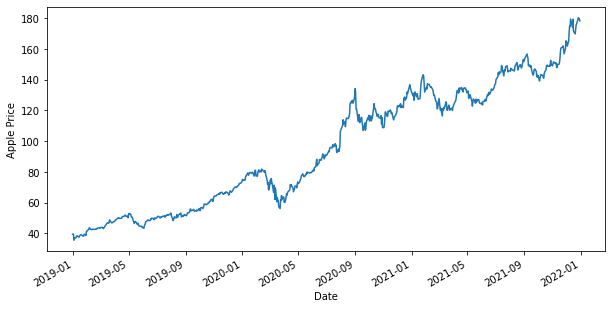

In [4]:
df = pdr.get_data_yahoo('AAPL', start="2019-01-01", end="2021-12-31")         
df= df.dropna()
df.Close.plot(figsize=(10,5))
plt.ylabel("Apple Price")
plt.show()

In [5]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
# Moving Avergae = 100 days
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

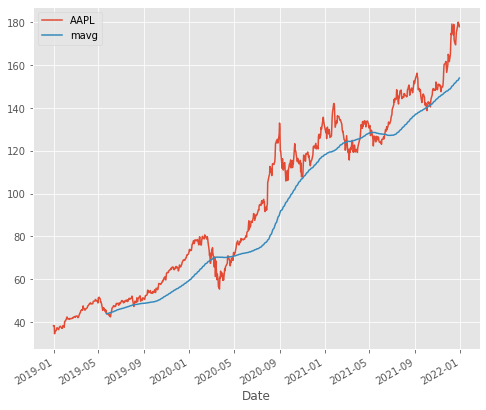

In [8]:
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In [9]:
#Moving Average
ma_list = [50, 100, 200]

for ma in ma_list:
    
    column_name = f'MA_{ma}'
    df[column_name] = df['Adj Close'].rolling(ma).mean()

    print(df)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-12-31   39.632500   39.840000   39.119999   39.435001   38.233898   
2019-01-02   38.722500   39.712502   38.557499   39.480000   38.277531   
2019-01-03   35.994999   36.430000   35.500000   35.547501   34.464798   
2019-01-04   36.132500   37.137501   35.950001   37.064999   35.936077   
2019-01-07   37.174999   37.207500   36.474998   36.982498   35.856094   
...                ...         ...         ...         ...         ...   
2021-12-23  175.850006  176.850006  175.270004  176.279999  176.055695   
2021-12-27  177.089996  180.419998  177.070007  180.330002  180.100540   
2021-12-28  180.160004  181.330002  178.529999  179.289993  179.061859   
2021-12-29  179.330002  180.630005  178.139999  179.380005  179.151749   
2021-12-30  179.470001  180.570007  178.089996  178.199997  177.973251   

               Volume       MA_50  
D

In [10]:
df.fillna(0,inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_100,MA_200
Date,,,,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.233898,140014000,0.000000,0.000000,0.000000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.277531,148158800,0.000000,0.000000,0.000000
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.464798,365248800,0.000000,0.000000,0.000000
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.936077,234428400,0.000000,0.000000,0.000000
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.856094,219111200,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,176.055695,68356600,158.594117,152.669757,142.067882
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600,159.328771,153.007463,142.366811
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300,160.021110,153.333688,142.645833


In [11]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA_50',
       'MA_100', 'MA_200'],
      dtype='object')

In [12]:
df1 = df.drop('Close', 1)
#df["Close"]

In [13]:
df1

,Open,High,Low,Adj Close,Volume,MA_50,MA_100,MA_200
Date,,,,,,,,
2018-12-31,39.632500,39.840000,39.119999,38.233898,140014000,0.000000,0.000000,0.000000
2019-01-02,38.722500,39.712502,38.557499,38.277531,148158800,0.000000,0.000000,0.000000
2019-01-03,35.994999,36.430000,35.500000,34.464798,365248800,0.000000,0.000000,0.000000
2019-01-04,36.132500,37.137501,35.950001,35.936077,234428400,0.000000,0.000000,0.000000
2019-01-07,37.174999,37.207500,36.474998,35.856094,219111200,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.055695,68356600,158.594117,152.669757,142.067882
2021-12-27,177.089996,180.419998,177.070007,180.100540,74919600,159.328771,153.007463,142.366811
2021-12-28,180.160004,181.330002,178.529999,179.061859,79144300,160.021110,153.333688,142.645833


<AxesSubplot:>

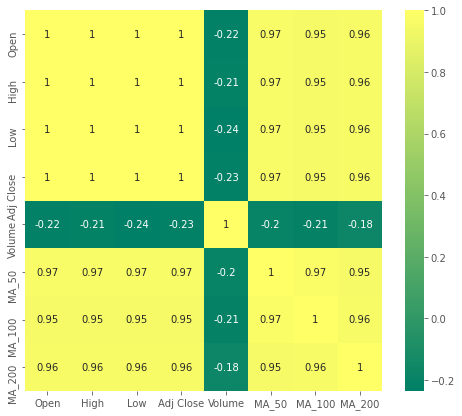

In [14]:
sns.heatmap(df1.corr(), annot=True, cmap='summer')

<AxesSubplot:>

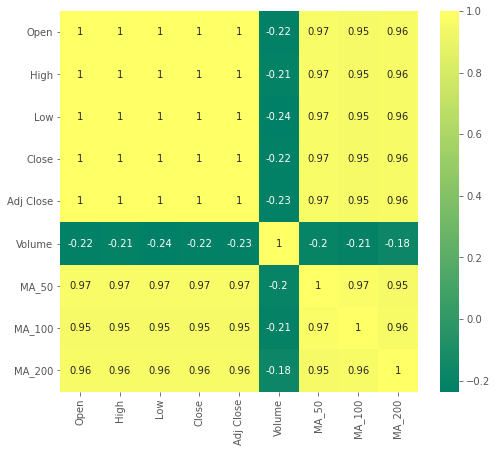

In [15]:
# Correlation plot for the daily returns
sns.heatmap(df.corr(), annot=True, cmap='summer')

<AxesSubplot:xlabel='Date'>

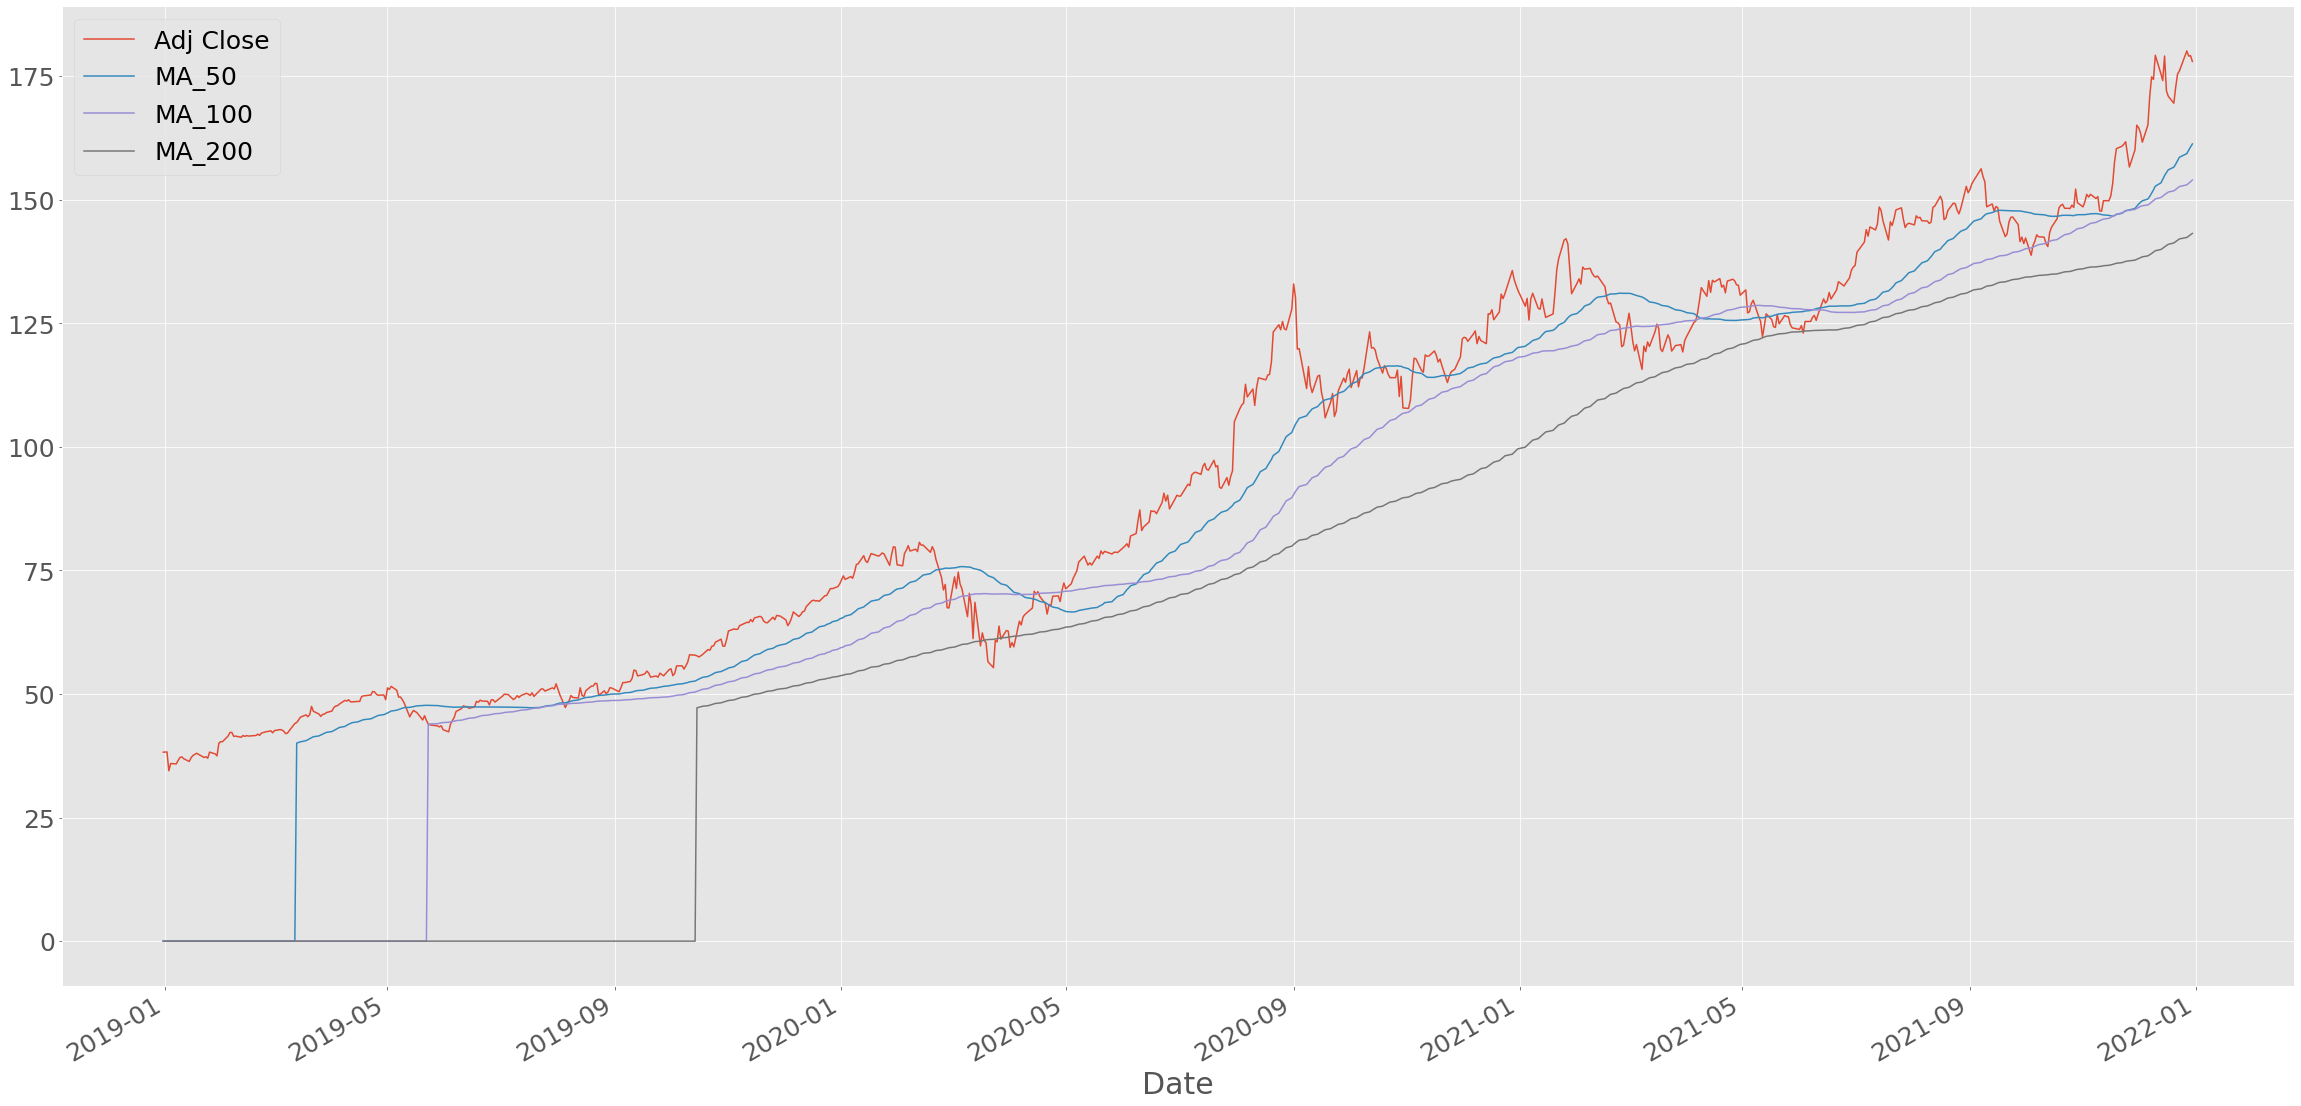

In [16]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25})

df[['Adj Close', 'MA_50', 'MA_100', 'MA_200']].plot(figsize=(40,20))

In [17]:
df["daily_return"]= df['Adj Close'].pct_change()
df["daily_return"]

Date
2018-12-31         NaN
2019-01-02    0.001141
2019-01-03   -0.099608
2019-01-04    0.042689
2019-01-07   -0.002226
                ...   
2021-12-23    0.003644
2021-12-27    0.022975
2021-12-28   -0.005767
2021-12-29    0.000502
2021-12-30   -0.006578
Name: daily_return, Length: 757, dtype: float64

<AxesSubplot:xlabel='Close', ylabel='Density'>

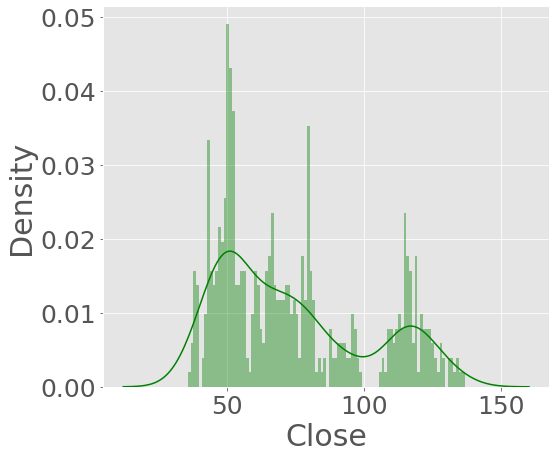

In [32]:
sns.distplot(df.loc['2019-01-01':'2020-12-31']['Close'],color='green',bins=100)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,757.0,9.584836e+01,3.960263e+01,3.599500e+01,5.576500e+01,9.125000e+01,1.298000e+02,1.811200e+02
High,757.0,9.697105e+01,4.002388e+01,3.643000e+01,5.614500e+01,9.261750e+01,1.312600e+02,1.821300e+02
Low,757.0,9.480103e+01,3.914809e+01,3.550000e+01,5.509250e+01,9.056750e+01,1.284900e+02,1.785300e+02
Close,757.0,9.594996e+01,3.960266e+01,3.554750e+01,5.589750e+01,9.121000e+01,1.302100e+02,1.803300e+02
Adj Close,757.0,9.505049e+01,3.983669e+01,3.446480e+01,5.484460e+01,9.021722e+01,1.296008e+02,1.801005e+02
Volume,757.0,1.202180e+08,5.753187e+07,4.100000e+07,8.257260e+07,1.058613e+08,1.396344e+08,4.265100e+08
MA_50,757.0,8.837538e+01,4.267163e+01,0.000000e+00,5.174279e+01,7.981961e+01,1.273019e+02,1.612735e+02
MA_100,757.0,8.194432e+01,4.555032e+01,0.000000e+00,4.950616e+01,7.403203e+01,1.255040e+02,1.539906e+02
MA_200,757.0,6.937581e+01,4.908164e+01,0.000000e+00,0.000000e+00,6.997217e+01,1.166933e+02,1.431872e+02
daily_return,756.0,2.267472e-03,2.149213e-02,-1.286471e-01,-7.482673e-03,1.780857e-03,1.321281e-02,1.198084e-01


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2018-12-31 to 2021-12-30
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          757 non-null    float64
 1   High          757 non-null    float64
 2   Low           757 non-null    float64
 3   Close         757 non-null    float64
 4   Adj Close     757 non-null    float64
 5   Volume        757 non-null    int64  
 6   MA_50         757 non-null    float64
 7   MA_100        757 non-null    float64
 8   MA_200        757 non-null    float64
 9   daily_return  756 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 81.2 KB


In [21]:
# Number of features
print('- Number of features: %d' % df.shape[1])
for c in df.columns:
    print('  - %s' % c)

- Number of features: 10
  - Open
  - High
  - Low
  - Close
  - Adj Close
  - Volume
  - MA_50
  - MA_100
  - MA_200
  - daily_return


In [22]:
#data types
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
MA_50           float64
MA_100          float64
MA_200          float64
daily_return    float64
dtype: object

In [23]:
df.isnull

<bound method DataFrame.isnull of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-12-31   39.632500   39.840000   39.119999   39.435001   38.233898   
2019-01-02   38.722500   39.712502   38.557499   39.480000   38.277531   
2019-01-03   35.994999   36.430000   35.500000   35.547501   34.464798   
2019-01-04   36.132500   37.137501   35.950001   37.064999   35.936077   
2019-01-07   37.174999   37.207500   36.474998   36.982498   35.856094   
...                ...         ...         ...         ...         ...   
2021-12-23  175.850006  176.850006  175.270004  176.279999  176.055695   
2021-12-27  177.089996  180.419998  177.070007  180.330002  180.100540   
2021-12-28  180.160004  181.330002  178.529999  179.289993  179.061859   
2021-12-29  179.330002  180.630005  178.139999  179.380005  179.151749   
2021-12-30  179.470001  180.570007  178.089996  178.199997  177.973251   

   

In [24]:
df.fillna(0,inplace=True)

#### Split Train and Test

In [33]:
target_col = "Close"
X = df[[col for col in df.columns if col != target_col]]
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=False)
#'y' is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict.

In [99]:
y

array([ 1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1,
       -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,
       -1, -1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,
        1, -1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1,
        1, -1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1,
        1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
        1,  1, -1, -1, -1

In [35]:
train_size = int(len(X) * 0.8)
train, test = X[0:train_size], X[train_size:len(X)]
print('Total Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Total Observations: 757
Training Observations: 605
Testing Observations: 152


In [36]:
# Train data set
X_train = X[:train_size]
y_train = y[:train_size] 

# Test data set
X_test = X[train_size:]
y_test = y[train_size:]

In [37]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler (feature_range =(0,1))
#X_train = scaler.fit_transform(X_train)
#X_test= scaler.fit_transform(X_test)

In [38]:
print("Train Type:", type(X_train))
print("Test Type:", type(X_test))
print("Test Type:", type(y_test))
print("Test Type:", type(y_train))

Train Type: <class 'pandas.core.frame.DataFrame'>
Test Type: <class 'pandas.core.frame.DataFrame'>
Test Type: <class 'numpy.ndarray'>
Test Type: <class 'numpy.ndarray'>


In [39]:
#Creating a function that creates a dataframe for 
#testing model performance
def model_p (model,X_train,X_test,y_train,y_test,pred,model_name):
  #Takes the data, returns a dataframe that calculates the performance of the model"""
  cv_results=cross_val_score(model,X_train,y_train,cv=5)
  
  perf_df=pd.DataFrame({"Mean_CV":np.mean(cv_results),"Std_CV":np.std(cv_results),'Train_Score':model.score(X_train,y_train),"Test_Score":model.score(X_test,y_test),"Precision_Score":precision_score(y_test,pred),"Recall_Score":recall_score(y_test,pred),"F1_Score":f1_score(y_test,pred)},index=[model_name])
  
  return perf_df

In [40]:
svc_model = SVC()
parameters={"C":[0.01,0.1,1,10]}
searcher=GridSearchCV(svc_model,parameters,cv=5,n_jobs=-1).fit(X_train,y_train)
best_model_svc=searcher.best_estimator_
pred_svc = best_model_svc.predict(X_test)
print("Best Parameters:",searcher.best_params_)
perf_svc=model_p(best_model_svc,X_train,X_test,y_train,y_test,pred_svc,"Linear SVC")
perf_svc

Best Parameters: {'C': 0.01}


,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Linear SVC,0.547107,0.003306,0.547107,0.565789,0.565789,1.0,0.722689


In [41]:
logreg = LogisticRegression()
params={"C":[0.001,0.01,0.1,1,10],"penalty":["l1","l2"]}
searcher=GridSearchCV(logreg,params,cv=5,n_jobs=-1).fit(X_train,y_train)
best_model_log=searcher.best_estimator_
pred_log = best_model_log.predict(X_test)
print("Best Parameters:",searcher.best_params_)
y_pred_log_proba=best_model_log.predict_proba(X_test)[:,1]
print("ROC AUC Score:",roc_auc_score(y_test,y_pred_log_proba))
perf_log= model_p(best_model_log,X_train,X_test,y_train,y_test,pred_log,"Logistic Regression")
perf_log

Best Parameters: {'C': 0.001, 'penalty': 'l2'}
ROC AUC Score: 0.49630021141649044


,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Logistic Regression,0.547107,0.003306,0.547107,0.565789,0.565789,1.0,0.722689


In [72]:
linreg.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [42]:
knn=KNeighborsClassifier()
params={"n_neighbors":np.arange(3,10,2)}
searcher=GridSearchCV(knn,params,cv=5,n_jobs=-1).fit(X_train,y_train)
best_model_knn=searcher.best_estimator_
pred_knn = best_model_knn.predict(X_test)
print("Best Parameters:",searcher.best_params_)
perf_knn=model_p(best_model_knn,X_train,X_test,y_train,y_test,pred_knn,"KNN")
perf_knn

Best Parameters: {'n_neighbors': 7}


,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
KNN,0.469421,0.008097,0.642975,0.526316,0.583333,0.569767,0.576471


In [43]:
dt=DecisionTreeClassifier(random_state=42)
parameters={"max_depth":[*range(3,10,2),None],"max_features":[*range(3,10,2),None],"min_samples_leaf":list(range(1,10,2)),"criterion":["gini","entropy"]}
searcher=GridSearchCV(dt,parameters,cv=5,n_jobs=-1).fit(X_train,y_train)
best_model_dt=searcher.best_estimator_
pred_dt = best_model_dt.predict(X_test)
print("Best Parameters:",searcher.best_params_)
perf_dt=model_p(best_model_dt,X_train,X_test,y_train,y_test,pred_dt,"Decision Tree")
perf_dt

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 7}


,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Decision Tree,0.550413,0.046044,0.638017,0.440789,0.555556,0.05814,0.105263


In [44]:
rf=RandomForestClassifier(random_state=42,n_estimators=100).fit(X_train,y_train)
pred_rf=rf.predict(X_test)
perf_rf=model_p(rf,X_train,X_test,y_train,y_test,pred_rf,"Random Forest")
perf_rf

,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Random Forest,0.452893,0.085152,1.0,0.440789,0.666667,0.023256,0.044944


In [45]:
nb = GaussianNB()
nb.fit(X_train,y_train)
pred_nb = nb.predict(X_test)
perf_nb=model_p(nb,X_train,X_test,y_train,y_test,pred_nb,"Gaussian NB")
perf_nb

,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Gaussian NB,0.535537,0.019835,0.547107,0.565789,0.565789,1.0,0.722689


In [46]:
pd.concat([perf_nb, perf_svc, perf_log, perf_knn, perf_dt, perf_rf])

,Mean_CV,Std_CV,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score
Gaussian NB,0.535537,0.019835,0.547107,0.565789,0.565789,1.000000,0.722689
Linear SVC,0.547107,0.003306,0.547107,0.565789,0.565789,1.000000,0.722689
Logistic Regression,0.547107,0.003306,0.547107,0.565789,0.565789,1.000000,0.722689
KNN,0.469421,0.008097,0.642975,0.526316,0.583333,0.569767,0.576471
Decision Tree,0.550413,0.046044,0.638017,0.440789,0.555556,0.058140,0.105263
Random Forest,0.452893,0.085152,1.000000,0.440789,0.666667,0.023256,0.044944


In [47]:
model = SVC().fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 54.71%
Test Accuracy: 56.58%


In [48]:
model = logreg.fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 54.71%
Test Accuracy: 56.58%


In [49]:
model = knn.fit(X_train, y_train)
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 65.29%
Test Accuracy: 51.97%


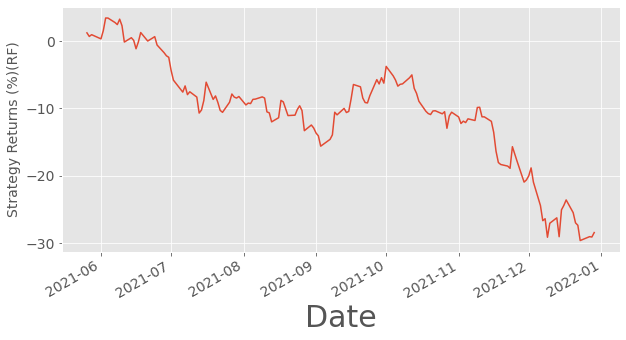

In [50]:
#Using random forest

df['Predicted_Signal_rf'] = rf.predict(X)
# Calculate log returns
df['Return'] = np.log(df.Close.shift(-1) / df.Close)*100
df['Strategy_Return'] = df.Return * df.Predicted_Signal_rf
df.Strategy_Return.iloc[train_size:].cumsum().plot(figsize=(10,5), fontsize =14)
plt.ylabel("Strategy Returns (%)(RF)", fontsize =14)
plt.show()

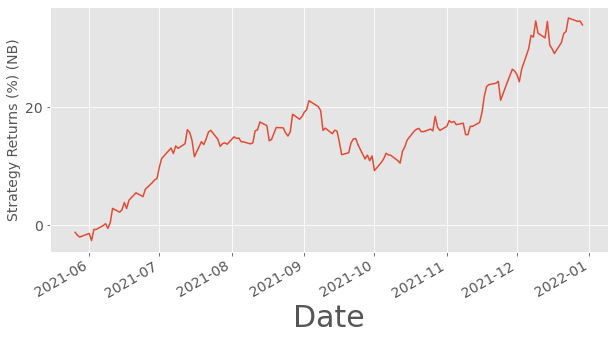

In [51]:
#using Gassuian 

df['Predicted_Signal_NB'] = nb.predict(X)

# Calculate log returns
df['Return'] = np.log(df.Close.shift(-1) / df.Close)*100
df['Strategy_Return'] = df.Return * df.Predicted_Signal_NB
df.Strategy_Return.iloc[train_size:].cumsum().plot(figsize=(10,5), fontsize =14)
plt.ylabel("Strategy Returns (%) (NB)", fontsize =14)
plt.show()

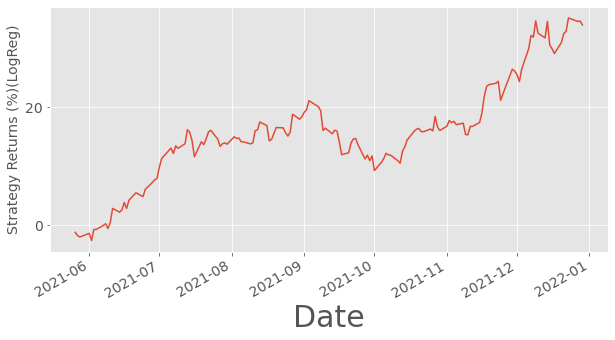

In [52]:
#using LogReg
logreg.fit(X,y)
df['Predicted_Signal_logreg'] = logreg.predict(X)
# Calculate log returns
df['Return'] = np.log(df.Close.shift(-1) / df.Close)*100
df['Strategy_Return'] = df.Return * df.Predicted_Signal_logreg
df.Strategy_Return.iloc[train_size:].cumsum().plot(figsize=(10,5), fontsize =14)
plt.ylabel("Strategy Returns (%)(LogReg)", fontsize =14)
plt.show()

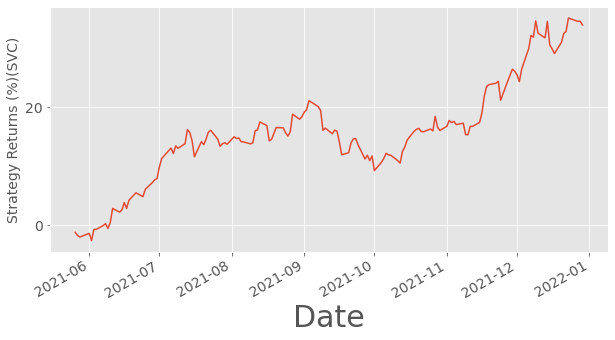

In [53]:
#using svc

model = SVC().fit(X_train, y_train)

df['Predicted_Signal_svc'] = model.predict(X)
# Calculate log returns
df['Return'] = np.log(df.Close.shift(-1) / df.Close)*100
df['Strategy_Return'] = df.Return * df.Predicted_Signal_svc
df.Strategy_Return.iloc[train_size:].cumsum().plot(figsize=(10,5), fontsize =14)
plt.ylabel("Strategy Returns (%)(SVC)", fontsize =14)
plt.show()

In [54]:
df.Return

Date
2018-12-31     0.114042
2019-01-02   -10.492436
2019-01-03     4.180324
2019-01-04    -0.222831
2019-01-07     1.888370
                ...    
2021-12-23     2.271488
2021-12-27    -0.578395
2021-12-28     0.050192
2021-12-29    -0.659999
2021-12-30          NaN
Name: Return, Length: 757, dtype: float64

In [63]:
predicted = df['Predicted_Signal_logreg'] 
print(predicted)

Date
2018-12-31    1
2019-01-02    1
2019-01-03    1
2019-01-04    1
2019-01-07    1
             ..
2021-12-23    1
2021-12-27    1
2021-12-28    1
2021-12-29    1
2021-12-30    1
Name: Predicted_Signal_logreg, Length: 757, dtype: int64


In [65]:
predicted_test = logreg.predict(X_test)
print(predicted_test)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [66]:
print(X)

                  Open        High         Low   Adj Close     Volume  \
Date                                                                    
2018-12-31   39.632500   39.840000   39.119999   38.233898  140014000   
2019-01-02   38.722500   39.712502   38.557499   38.277531  148158800   
2019-01-03   35.994999   36.430000   35.500000   34.464798  365248800   
2019-01-04   36.132500   37.137501   35.950001   35.936077  234428400   
2019-01-07   37.174999   37.207500   36.474998   35.856094  219111200   
...                ...         ...         ...         ...        ...   
2021-12-23  175.850006  176.850006  175.270004  176.055695   68356600   
2021-12-27  177.089996  180.419998  177.070007  180.100540   74919600   
2021-12-28  180.160004  181.330002  178.529999  179.061859   79144300   
2021-12-29  179.330002  180.630005  178.139999  179.151749   62348900   
2021-12-30  179.470001  180.570007  178.089996  177.973251   59773000   

                 MA_50      MA_100      MA_200  da

In [85]:
linreg = LinearRegression()
# Fit the model with the Training data
model = linreg.fit(X_train,y_train)
# define search space
space = dict()

# define search
params = {"normalize":[True, False]}
searcher = GridSearchCV(model,params, n_jobs=-1, cv=5).fit(X_train,y_train)

print('Best Score: %s' % searcher.best_score_)
print('Best Hyperparameters: %s' % searcher.best_params_)


Best Score: -0.059118448929403614
Best Hyperparameters: {'normalize': True}


In [88]:
predicted = linreg.predict(X_test)
print(predicted)

[ 0.00527393  0.18380648  0.04855664  0.02321883 -0.02157656  0.06236164
 -0.04900645 -0.06693039  0.11702589 -0.01142215  0.1630619  -0.06296405
 -0.12728758  0.06457384 -0.1018617   0.01999105  0.06502532 -0.10342429
 -0.07387246  0.00284933 -0.01269504  0.00215865 -0.01397455 -0.06525669
 -0.0153806  -0.07608263 -0.10368271  0.03182431 -0.16469986  0.0550618
 -0.02388171 -0.02033098  0.11208415 -0.18724485 -0.05098201  0.16497136
  0.05805624 -0.05338436 -0.03281622  0.04399251 -0.14044539 -0.02341966
 -0.02353991  0.05888331  0.02236101 -0.01661218 -0.00334094 -0.06507709
 -0.04984098 -0.04586287 -0.02512274 -0.08322175  0.04979933 -0.06067523
 -0.15221096 -0.13865363 -0.24987629 -0.01884689  0.18686037  0.018289
 -0.16756485 -0.11692614 -0.00219583 -0.02732969  0.00284778 -0.16311731
 -0.16665495 -0.12520095  0.05765101 -0.17160462 -0.17085608 -0.17460619
 -0.12785108 -0.02735525  0.19137112 -0.12749227 -0.05198877 -0.26145648
 -0.19434814 -0.04016821 -0.02121772 -0.11765612 -0.17

In [94]:
df["Close"]

Date
2018-12-31     39.435001
2019-01-02     39.480000
2019-01-03     35.547501
2019-01-04     37.064999
2019-01-07     36.982498
                 ...    
2021-12-23    176.279999
2021-12-27    180.330002
2021-12-28    179.289993
2021-12-29    179.380005
2021-12-30    178.199997
Name: Close, Length: 757, dtype: float64

In [98]:
data1 = pd.DataFrame({'Actual': y_test, 'Predicted' : predicted.flatten()})
data1.head()

,Actual,Predicted
0,-1,0.005274
1,-1,0.183806
2,-1,0.048557
3,1,0.023219
4,-1,-0.021577
